# Number of Clusters

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index. 

In this notebook we employed the **Davies Bouldin** index. This metric was not seen during classes but if the ground truth is not known, it can be used to evaluate the model. This index is defined as the average similarity between each cluster and its most similar one. Zero is the lowest possible score. Values closer to zero indicate a better partition.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [10]:
#!pip install scikit-learn==0.20.0 MulticoreTSNE

In [3]:
import numpy as np
import sklearn
print(sklearn.__version__)
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import davies_bouldin_score


0.20.0


In [4]:
X = r.readWord2Vec()

print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
(13229, 128)


In [5]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 7000
tsne_bow = TSNE(n_jobs=-1, n_components=2, perplexity=500, verbose=True)
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Davies-Bouldin --- K-means
This methods aims to define the best number of clusters (K) by the silhouette score.

In [6]:
davies_bouldin = 10
Ks = []
Ds = []
Epsilon = 2.0
it = 1
J = 0.

k = 2
print("###############################")
while ((davies_bouldin > Epsilon) or (it == 1)):
    print("Number of Clusters:",k)
    print("Starting K-means++")
    cluster = KMeans(n_jobs=-1, n_clusters=k,random_state=42)
    cluster_result = cluster.fit(X)
    print("Finished")    
    davies_bouldin = davies_bouldin_score(X,cluster_result.labels_)
    Ds.append(davies_bouldin)
    print("davies-bouldin score of", davies_bouldin)    
    Ks.append(k)
    k += 100
    it += 1
    print("###############################")
    
best_K = k-100
print("\nBest k:",best_K)
print("Number of iterations:",it)

###############################
Number of Clusters: 2
Starting K-means++
Finished
davies-bouldin score of 5.2613971716
###############################
Number of Clusters: 102
Starting K-means++


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Finished
davies-bouldin score of 4.1096283101
###############################
Number of Clusters: 202
Starting K-means++


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Finished
davies-bouldin score of 3.63409728351
###############################
Number of Clusters: 302
Starting K-means++


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Finished
davies-bouldin score of 3.5262364658
###############################
Number of Clusters: 402
Starting K-means++


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Finished
davies-bouldin score of 3.36794613248
###############################
Number of Clusters: 502
Starting K-means++


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Finished
davies-bouldin score of 3.24170777783
###############################
Number of Clusters: 602
Starting K-means++


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Finished
davies-bouldin score of 3.04259055634
###############################
Number of Clusters: 702
Starting K-means++


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.94134596608
###############################
Number of Clusters: 802
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.85364286315
###############################
Number of Clusters: 902
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.73842343882
###############################
Number of Clusters: 1002
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.66351664866
###############################
Number of Clusters: 1102
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.57199075461
###############################
Number of Clusters: 1202
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.49706890766
###############################
Number of Clusters: 1302
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.42909706591
###############################
Number of Clusters: 1402
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.35826581733
###############################
Number of Clusters: 1502
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.301495576
###############################
Number of Clusters: 1602
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.25385435607
###############################
Number of Clusters: 1702
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.17538241256
###############################
Number of Clusters: 1802
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.14136220587
###############################
Number of Clusters: 1902
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.09362776765
###############################
Number of Clusters: 2002
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.03295522153
###############################
Number of Clusters: 2102
Starting K-means++
Finished


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


davies-bouldin score of 2.02342016142
###############################
Number of Clusters: 2202
Starting K-means++
Finished
davies-bouldin score of 1.96969073003
###############################

Best k: 2202
Number of iterations: 24


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [7]:
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_jobs=-1, n_clusters=best_K)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")

#############################
Best K = 2202
Applying K-means
Finished
#############################


In [8]:
true_label = best_cluster_result.labels_

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

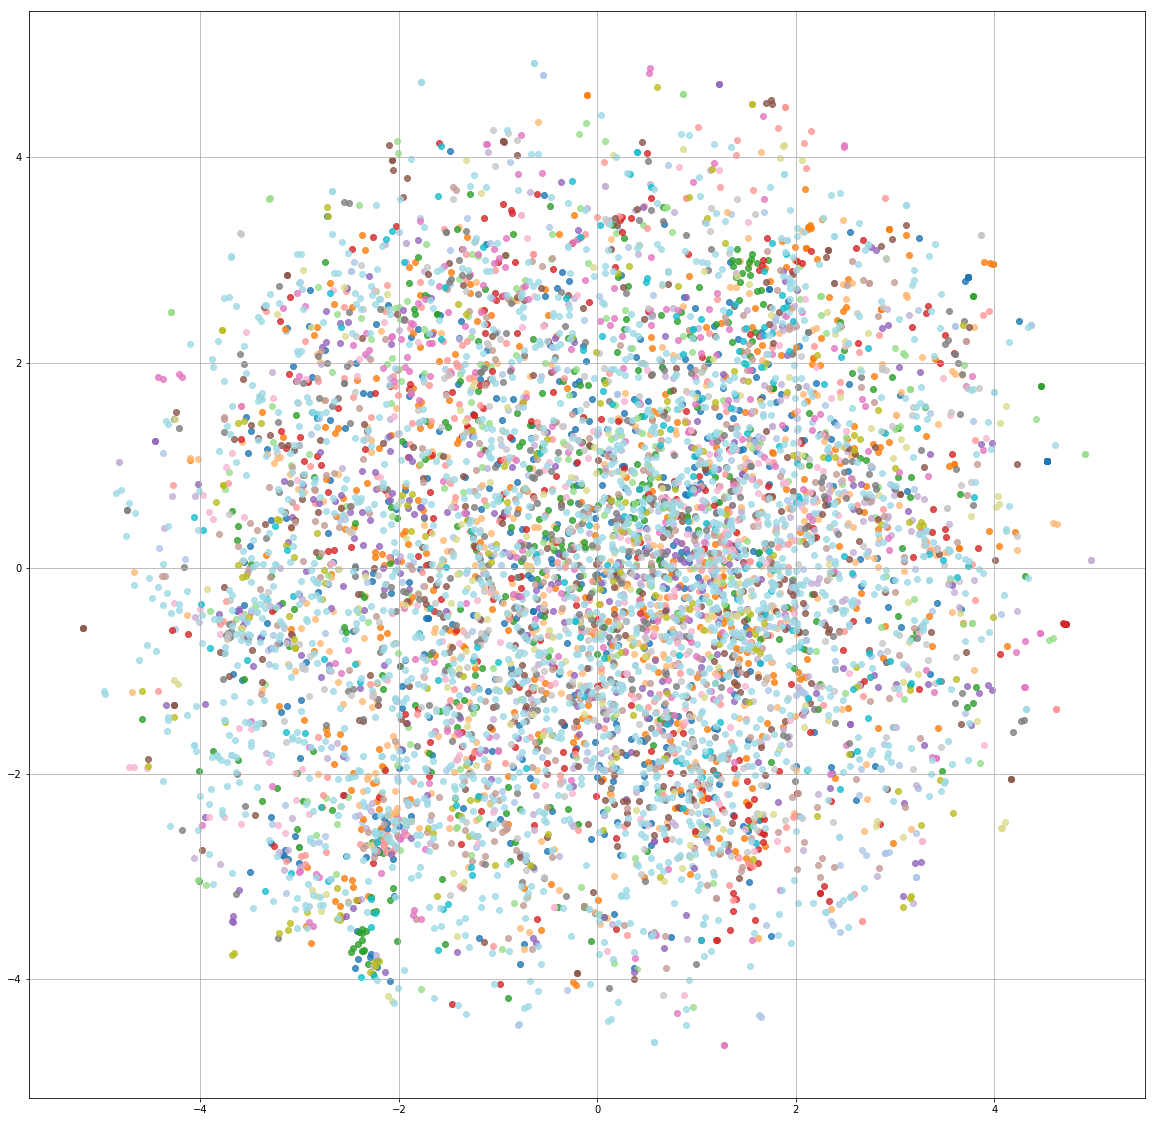

In [9]:
v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz])